In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

#Dataset

In [13]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

57344/57026 [==============================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [2]:
import pandas as pd

In [27]:
dfr = pd.DataFrame(x_train)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [56]:
import sqlite3

In [57]:
connect = sqlite3.connect('./db.sqlite3')
dfr.to_sql('boston_housing_resource', connect, if_exists='append', index=False)

In [59]:
df = pd.read_sql_query('select * from boston_housing_resource', connect)

In [61]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [ ]:
df.describe()

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [64]:
df = pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,7.832019e-18,7.364846e-17,2.748077e-18,1.019536e-16,3.022884e-17,-1.690067e-17,1.099231e-17,6.485461e-17,1.951135e-17,-1.648846e-17,-2.473269e-17,1.147322e-17,-1.209154e-17
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [65]:
df.to_sql('boston_housing_scale_x_train', connect, if_exists='append', index=False)

In [66]:
dfr = pd.read_sql_query('select * from boston_housing_scale_x_train', connect)

In [67]:
dfr.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,7.832019e-18,7.364846e-17,2.748077e-18,1.019536e-16,3.022884e-17,-1.690067e-17,1.099231e-17,6.485461e-17,1.951135e-17,-1.648846e-17,-2.473269e-17,1.147322e-17,-1.209154e-17
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


#Model and fit

In [15]:
model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.Input(shape=(13))) # input layer

model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1,)) # output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

In [24]:
hist = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
9/9 [==============================] - 0s 15ms/step - loss: 1.2004 - mae: 0.8140 - val_loss: 1.6180 - val_mae: 0.9109
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 1.0104 - mae: 0.7281 - val_loss: 1.6788 - val_mae: 0.9240
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.9606 - mae: 0.6999 - val_loss: 1.5711 - val_mae: 0.8756
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 0.9875 - mae: 0.7153 - val_loss: 2.1997 - val_mae: 1.0950
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 0.9441 - mae: 0.7024 - val_loss: 1.9792 - val_mae: 1.0211
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 1.1203 - mae: 0.7695 - val_loss: 2.1400 - val_mae: 1.0290
Epoch 7/500
9/9 [==============================] - 0s 7ms/step - loss: 0.8954 - mae: 0.7182 - val_loss: 1.9300 - val_mae: 0.9811
Epoch 8/500
9/9 [==============================] - 0s 9ms/step - loss: 0.8647 - mae: 0.6742 - va

#Evaluation

In [25]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

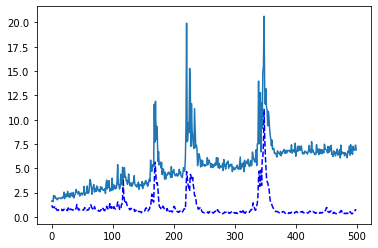

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

In [46]:
# model.evaluate(x_train, y_train) # activation='sigmoid' loss: 4.8532 - mae: 4.8532

13/13 [==============================] - 0s 2ms/step - loss: 4.8532 - mae: 4.8532


[4.853243827819824, 4.853243827819824]

In [71]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 1.6008 - mae: 1.6008


[1.6008074283599854, 1.6008074283599854]

In [21]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 1.3950 - mae: 0.8746


[1.39498770236969, 0.8745676875114441]

#Service

In [20]:
x_train[10]

array([  9.59571,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.404  ,
       100.     ,   1.639  ,  24.     , 666.     ,  20.2    , 376.11   ,
        20.31   ])

In [22]:
model.predict([[  9.59571,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.404  ,
       100.     ,   1.639  ,  24.     , 666.     ,  20.2    , 376.11   ,
        20.31   ]])

array([[13.519071]], dtype=float32)

In [23]:
y_train[10]

12.1